In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [246]:
df = pd.read_csv('vendas_loja_seminovos.csv', sep=';', encoding='utf-8')

df['Data_venda'] = pd.to_datetime(df['Data_venda'])

df['Ano_venda'] = df['Data_venda'].dt.year

         Sexo  Ano_venda  QTD_vendas
0    Feminino       2017         565
1    Feminino       2018         835
2    Feminino       2019         829
3    Feminino       2020         893
4    Feminino       2021         845
5    Feminino       2022         878
6    Feminino       2023         874
7    Feminino       2024         830
8    Feminino       2025         265
9   Masculino       2017         403
10  Masculino       2018         508
11  Masculino       2019         516
12  Masculino       2020         526
13  Masculino       2021         494
14  Masculino       2022         527
15  Masculino       2023         509
16  Masculino       2024         498
17  Masculino       2025         155


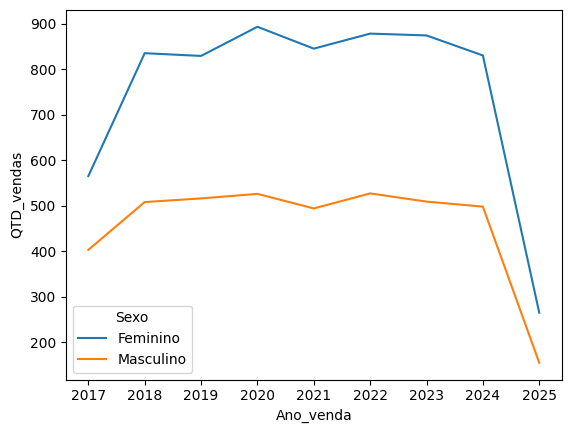

In [247]:
df_vendas_por_sexo = df.groupby(['Sexo','Ano_venda']).size().reset_index(name='QTD_vendas')
sns.lineplot (data=df_vendas_por_sexo, x='Ano_venda', y='QTD_vendas', hue='Sexo')

print(df_vendas_por_sexo)


In [248]:
df_preco_veiculos_ano = df[['Ano_venda','Valor_venda']].groupby('Ano_venda').mean('Valor_venda')
print(df_preco_veiculos_ano) 

df_qtd_vendas_ano = df.groupby('Ano_venda').size().reset_index(name='QTD_vendas')
print(df_qtd_vendas_ano)



             Valor_venda
Ano_venda               
2017       139118.300165
2018       142633.098615
2019       140920.097286
2020       140026.204693
2021       140608.646109
2022       140085.121431
2023       139839.291526
2024       143092.833840
2025       140650.147548
   Ano_venda  QTD_vendas
0       2017         968
1       2018        1343
2       2019        1345
3       2020        1419
4       2021        1339
5       2022        1405
6       2023        1383
7       2024        1328
8       2025         420


In [249]:
df_vendas_estado = df.groupby('Estado').size().reset_index(name='QTD_vendas')
df_vendas_estado = df_vendas_estado.sort_values(by='QTD_vendas', ascending=False)
df_vendas_estado


,Estado,QTD_vendas
10,MG,439
13,PA,431
7,ES,426
16,PI,422
24,SE,422
20,RO,421
23,SC,420
12,MT,416
19,RN,415
22,RS,414


C:\Users\marce\AppData\Local\Temp\ipykernel_8668\2639907472.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_fp_grupo = df.groupby(by=['Grupos_idade', 'Forma_pagamento']).size().reset_index(name='QTD_vendas')


([<matplotlib.axis.YTick at 0x1bd14adc7a0>,
 [Text(0, 0, '0'),
  Text(0, 100, '100'),
  Text(0, 200, '200'),
  Text(0, 300, '300'),
  Text(0, 400, '400'),
  Text(0, 500, '500'),
  Text(0, 600, '600'),
  Text(0, 700, '700'),
  Text(0, 800, '800'),
  Text(0, 900, '900'),
  Text(0, 1000, '1000'),
  Text(0, 1100, '1100'),
  Text(0, 1200, '1200'),
  Text(0, 1300, '1300'),
  Text(0, 1400, '1400')])

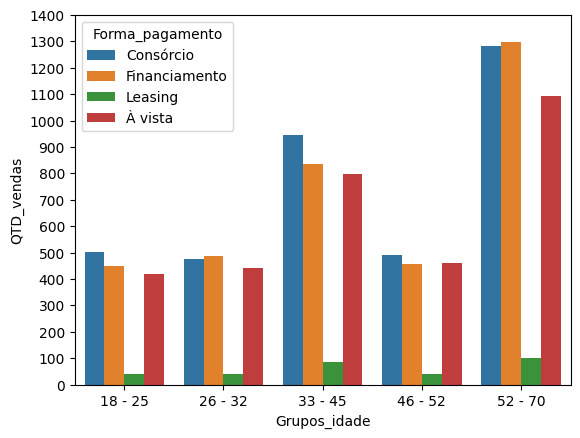

In [250]:
df['Grupos_idade'] = pd.cut(df['Idade'], bins=[18, 25, 32, 45, 52, 70], labels=['18 - 25','26 - 32','33 - 45','46 - 52','52 - 70'], right=True)

df_fp_grupo = df.groupby(by=['Grupos_idade', 'Forma_pagamento']).size().reset_index(name='QTD_vendas')

sns.barplot(data=df_fp_grupo, x='Grupos_idade', y='QTD_vendas', hue='Forma_pagamento')

plt.yticks(range(0, 1500, 100)) # Ajuste de MARCADORES no Eixo Y - 0 = Min, 1500 = Max, 100 = Range "de 100 em 100"


<Axes: xlabel='Sexo', ylabel='QTD_vendas'>

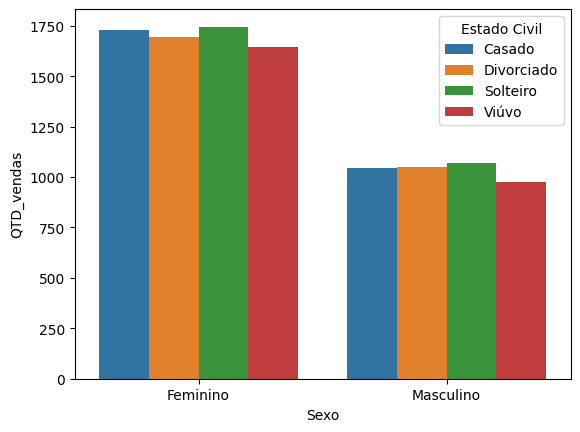

In [251]:
df_vendas_EC_sexo = df.groupby(by=['Estado Civil', 'Sexo']).size().reset_index(name='QTD_vendas')

sns.barplot(data=df_vendas_EC_sexo, x='Sexo', y='QTD_vendas', hue='Estado Civil')